In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
ds=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/rr_monthly_0.25.1900-2015.nc')
rr=ds.rr
land_sea_ds = xr.open_dataset('/g/data/eg3/pfd548/gridarea/land-sea_mask/fractional_land.1.5-deg.nc')
nw_area=rr.sel(lat=slice(-26,-10),lon=slice(112,138))
ne_area=rr.sel(lat=slice(-26,-10),lon=slice(138,156))
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/fx/atmos/fx/r0i0p0/latest/sftlf/sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
landfrac = xr.open_dataset(url).sftlf
nw_land=nw_area.where(landfrac>0)
ne_land=ne_area.where(landfrac>0)
nw_climate=nw_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
ne_climate=ne_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
nw_anomaly=(nw_land.groupby('time.month')-nw_climate).mean(dim=['lon','lat'])
ne_anomaly=(ne_land.groupby('time.month')-ne_climate).mean(dim=['lon','lat'])
ds2=xr.open_dataset('/home/563/lx7831/ncfile/sst.mnmean.nc')
sst=ds2.sst
nino3_area=sst.sel(lat=slice(5,-5),lon=slice(210,270))
nino34_area=sst.sel(lat=slice(5,-5),lon=slice(190,240))
nino4_area=sst.sel(lat=slice(5,-5),lon=slice(160,210))
nino3_climate=nino3_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino34_climate=nino34_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino4_climate=nino4_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino3_anomaly=(nino3_area.groupby('time.month')-nino3_climate).mean(dim='lat').mean(dim='lon')
nino34_anomaly=(nino34_area.groupby('time.month')-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area.groupby('time.month')-nino4_climate).mean(dim='lat').mean(dim='lon')
alpha=xr.where(nino3_anomaly*nino4_anomaly>0,0.4,0)
nct=nino3_anomaly-alpha*nino4_anomaly
nwp=nino4_anomaly-alpha*nino3_anomaly
nino3_rolling=nino3_anomaly.rolling(time=5).mean()
nino34_rolling=nino34_anomaly.rolling(time=5).mean()
nino4_rolling=nino4_anomaly.rolling(time=5).mean()
nct_rolling=nct.rolling(time=5).mean()
nwp_rolling=nwp.rolling(time=5).mean()
nino3_modern=nino3_rolling.sel(time=slice('1900','2015'))
nino34_modern=nino34_rolling.sel(time=slice('1900','2015'))
nino4_modern=nino4_rolling.sel(time=slice('1900','2015'))
nct_modern=nct_rolling.sel(time=slice('1900','2015'))
nwp_modern=nwp_rolling.sel(time=slice('1900','2015'))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/core/indexing.py:572: SerializationWarning: Unable to decode time axis into 

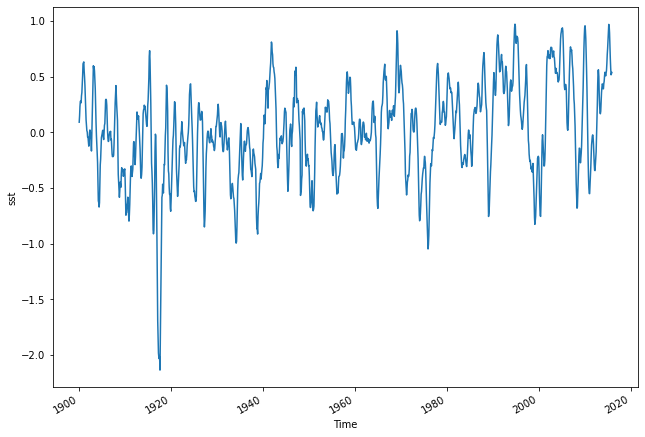

In [2]:
nwp_modern.plot(size=7)

(array([3.2325924e+07, 1.7976140e+06, 2.6888300e+05, 4.0434000e+04,
        6.4750000e+03, 1.2240000e+03, 2.4300000e+02, 4.6000000e+01,
        1.3000000e+01, 8.0000000e+00]),
 array([ 0.       ,  7.5929284, 15.185857 , 22.778786 , 30.371714 ,
        37.96464  , 45.55757  , 53.150497 , 60.743427 , 68.33636  ,
        75.92928  ], dtype=float32),
 <BarContainer object of 10 artists>)

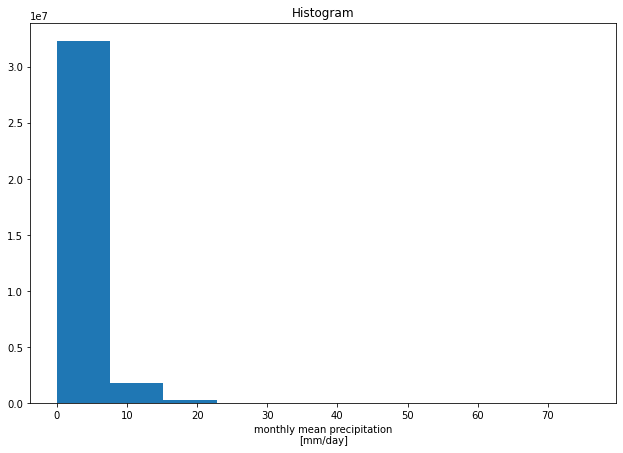

In [3]:
rr.plot(size=7)

In [4]:
rr

<xarray.DataArray 'rr' (time: 1392, lat: 139, lon: 178)>
[34440864 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Attributes:
    long_name:  monthly mean precipitation
    units:      mm/day

In [5]:
xr.corr

<function xarray.core.computation.corr(da_a, da_b, dim=None)>

In [6]:
xr.corr(rr,nino3_modern)

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [7]:
snino3=pd.Series(nino3_modern)
snino34=pd.Series(nino34_modern)
snino4=pd.Series(nino4_modern)
snct=pd.Series(nct_modern)
snwp=pd.Series(nwp_modern)

In [8]:
srr=pd.Series(rr)

ValueError: Wrong number of dimensions. values.ndim != ndim [3 != 1]

In [9]:
import scipy
def correlate_nino(data, nino):

    r, p = scipy.stats.pearsonr(data, nino)

    return r

In [10]:
correlate_nino(rr,nino3_modern)

AttributeError: module 'scipy' has no attribute 'stats'

In [11]:
from scipy import signal
from scipy.stats.stats import pearsonr

In [12]:
def correlate_nino(data, nino):

    r, p = scipy.stats.pearsonr(data, nino)

    return r

In [13]:
correlate_nino(rr,nino3_modern)

ValueError: shapes (1392,139,178) and (1392,) not aligned: 178 (dim 2) != 1392 (dim 0)

In [14]:
def correlate_nino(data, nino):

    r, p = scipy.stats.pearsonr(data, nino)

    return r

In [15]:
numpy.apply_along_axis(correlate_nino, 0, rainfall, nino)

NameError: name 'numpy' is not defined

In [16]:
np.apply_along_axis(correlate_nino, 0, rainfall, nino)

NameError: name 'rainfall' is not defined

In [17]:
np.apply_along_axis(correlate_nino, 0, rr, nino)

NameError: name 'nino' is not defined

In [18]:
np.apply_along_axis(correlate_nino, 0, rainfall, nino3_modern)

NameError: name 'rainfall' is not defined

In [19]:
np.apply_along_axis(correlate_nino, 0, rr, nino3_modern)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


array([[        nan,         nan,         nan, ...,  0.02793067,
         0.03389671,  0.04229839],
       [        nan,         nan,         nan, ...,  0.02658304,
         0.03004668,  0.04505658],
       [        nan,         nan,         nan, ...,  0.02568095,
         0.02801124,  0.03817307],
       ...,
       [        nan,         nan,         nan, ..., -0.16898386,
        -0.15535308, -0.13867637],
       [        nan,         nan,         nan, ..., -0.16957076,
        -0.15550129, -0.13830666],
       [        nan,         nan,         nan, ..., -0.16921521,
        -0.1546404 , -0.14379845]])

In [20]:
np.apply_along_axis(correlate_nino, 0, rr)

TypeError: correlate_nino() missing 1 required positional argument: 'nino'

In [21]:
np.apply_along_axis(correlate_nino, 0, nino3_modern)

TypeError: correlate_nino() missing 1 required positional argument: 'nino'

In [22]:
np.apply_along_axis(correlate_nino, 0, rr, nino3_modern)

array([[        nan,         nan,         nan, ...,  0.02793067,
         0.03389671,  0.04229839],
       [        nan,         nan,         nan, ...,  0.02658304,
         0.03004668,  0.04505658],
       [        nan,         nan,         nan, ...,  0.02568095,
         0.02801124,  0.03817307],
       ...,
       [        nan,         nan,         nan, ..., -0.16898386,
        -0.15535308, -0.13867637],
       [        nan,         nan,         nan, ..., -0.16957076,
        -0.15550129, -0.13830666],
       [        nan,         nan,         nan, ..., -0.16921521,
        -0.1546404 , -0.14379845]])

In [23]:
np.apply_along_axis(correlate_nino, 0, rr, nino3_modern).plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

(array([3.2325924e+07, 1.7976140e+06, 2.6888300e+05, 4.0434000e+04,
        6.4750000e+03, 1.2240000e+03, 2.4300000e+02, 4.6000000e+01,
        1.3000000e+01, 8.0000000e+00]),
 array([ 0.       ,  7.5929284, 15.185857 , 22.778786 , 30.371714 ,
        37.96464  , 45.55757  , 53.150497 , 60.743427 , 68.33636  ,
        75.92928  ], dtype=float32),
 <BarContainer object of 10 artists>)

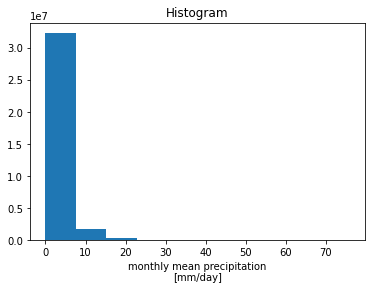

In [24]:
rr.plot()

In [25]:
np.apply_along_axis(correlate_nino, 0, rr, nino34_modern)

array([[        nan,         nan,         nan, ...,  0.0639691 ,
         0.068602  ,  0.07430954],
       [        nan,         nan,         nan, ...,  0.06253362,
         0.06537503,  0.076745  ],
       [        nan,         nan,         nan, ...,  0.06149734,
         0.06357378,  0.07213867],
       ...,
       [        nan,         nan,         nan, ..., -0.16688709,
        -0.14447169, -0.11853613],
       [        nan,         nan,         nan, ..., -0.16649201,
        -0.14365401, -0.11726806],
       [        nan,         nan,         nan, ..., -0.16453246,
        -0.1412589 , -0.12490569]])

In [26]:
np.apply_along_axis(correlate_nino, 0, rr, nino4_modern)

array([[        nan,         nan,         nan, ...,  0.14674249,
         0.15169498,  0.1585376 ],
       [        nan,         nan,         nan, ...,  0.14519425,
         0.14838574,  0.1609124 ],
       [        nan,         nan,         nan, ...,  0.14398788,
         0.14632254,  0.15522524],
       ...,
       [        nan,         nan,         nan, ..., -0.24378257,
        -0.21906349, -0.19005057],
       [        nan,         nan,         nan, ..., -0.24268534,
        -0.21759521, -0.18811634],
       [        nan,         nan,         nan, ..., -0.23986093,
        -0.21441125, -0.19640308]])

In [27]:
np.apply_along_axis(correlate_nino, 0, rr, nct_modern)

array([[        nan,         nan,         nan, ..., -0.0119841 ,
        -0.00612097,  0.00216278],
       [        nan,         nan,         nan, ..., -0.01313595,
        -0.00984967,  0.00483326],
       [        nan,         nan,         nan, ..., -0.01383938,
        -0.01169957, -0.00191666],
       ...,
       [        nan,         nan,         nan, ..., -0.13025541,
        -0.12119743, -0.109663  ],
       [        nan,         nan,         nan, ..., -0.13136921,
        -0.12188169, -0.10985429],
       [        nan,         nan,         nan, ..., -0.13186252,
        -0.12185085, -0.11407064]])

In [28]:
np.apply_along_axis(correlate_nino, 0, rr, nwp_modern)

array([[        nan,         nan,         nan, ...,  0.18080381,
         0.18413584,  0.18859182],
       [        nan,         nan,         nan, ...,  0.17948691,
         0.18182865,  0.19018826],
       [        nan,         nan,         nan, ...,  0.17838279,
         0.18021929,  0.18649278],
       ...,
       [        nan,         nan,         nan, ..., -0.24065224,
        -0.21463931, -0.1844772 ],
       [        nan,         nan,         nan, ..., -0.23868378,
        -0.2124183 , -0.18191894],
       [        nan,         nan,         nan, ..., -0.23489937,
        -0.20843195, -0.19003587]])

In [29]:
correlate_nino

<function __main__.correlate_nino(data, nino)>

In [30]:
xr.DataArray(correlate_nino, coords=[('lat', rr.lat), ('lon', rr.lon)])

<xarray.DataArray (lat: 139, lon: 178)>
array([[<function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>, ...,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>],
       [<function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>, ...,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>],
       [<function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>, ...,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>],
       ...,
       [<function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>, ...,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>],
       [<function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>, ...,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>],
       [<function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>, ...,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>,
        <function correlate_nino at 0x7f67f75c9700>]], dtype=object)
Coordinates:
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2

In [31]:
correlate=np.apply_along_axis(correlate_nino, 0, rr, nwp_modern)

In [32]:
xr.DataArray(correlate, coords=[('lat', rr.lat), ('lon', rr.lon)])

<xarray.DataArray (lat: 139, lon: 178)>
array([[        nan,         nan,         nan, ...,  0.18080381,
         0.18413584,  0.18859182],
       [        nan,         nan,         nan, ...,  0.17948691,
         0.18182865,  0.19018826],
       [        nan,         nan,         nan, ...,  0.17838279,
         0.18021929,  0.18649278],
       ...,
       [        nan,         nan,         nan, ..., -0.24065224,
        -0.21463931, -0.1844772 ],
       [        nan,         nan,         nan, ..., -0.23868378,
        -0.2124183 , -0.18191894],
       [        nan,         nan,         nan, ..., -0.23489937,
        -0.20843195, -0.19003587]])
Coordinates:
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2

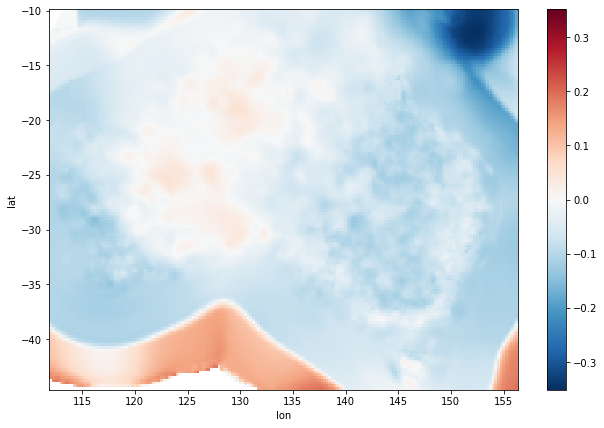

In [33]:
xr.DataArray(correlate, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

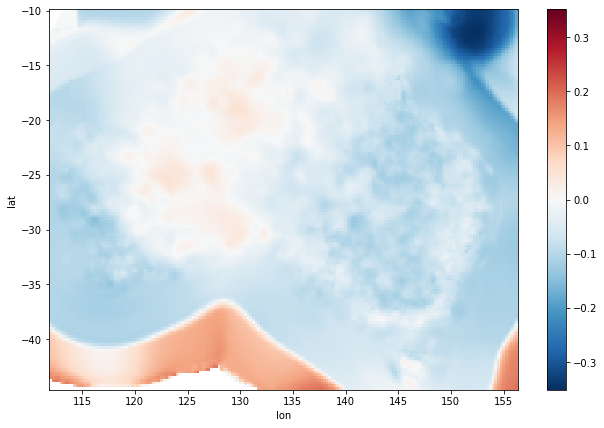

In [34]:
nino3_spatial=np.apply_along_axis(correlate_nino, 0, rr, nwp_modern)
xr.DataArray(nino3_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

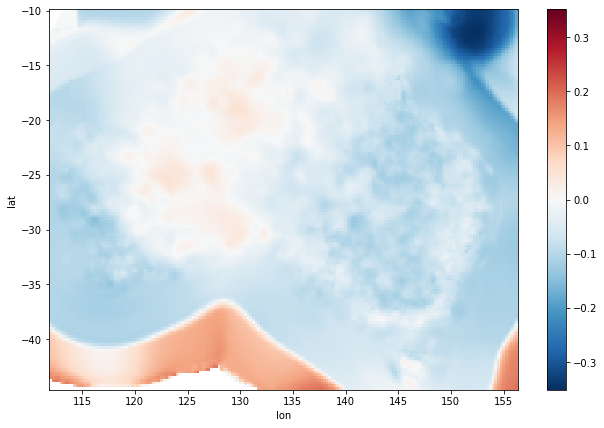

In [35]:
nwp_spatial=np.apply_along_axis(correlate_nino, 0, rr, nwp_modern)
xr.DataArray(nino3_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

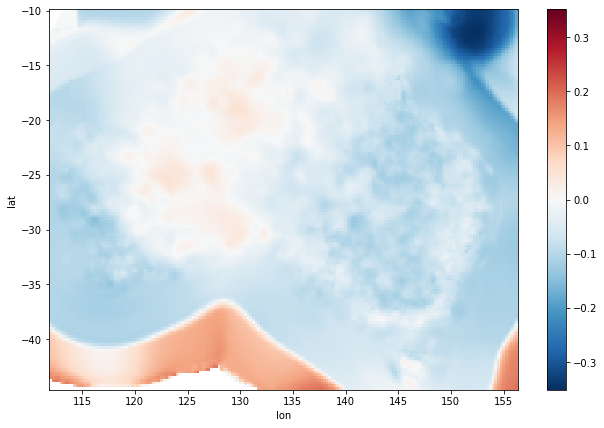

In [36]:
nwp_spatial=np.apply_along_axis(correlate_nino, 0, rr, nwp_modern)
xr.DataArray(nwp_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

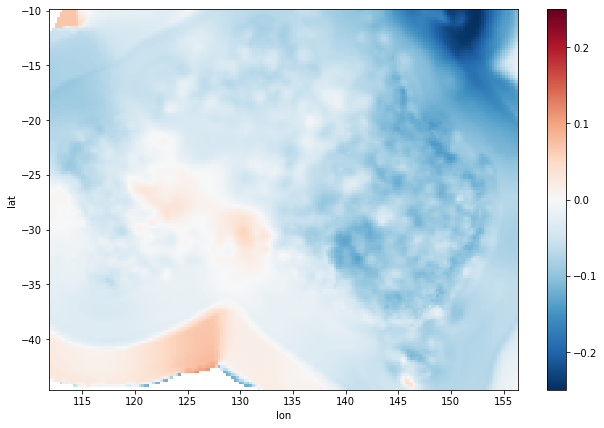

In [37]:
nct_spatial=np.apply_along_axis(correlate_nino, 0, rr, nct_modern)
xr.DataArray(nct_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

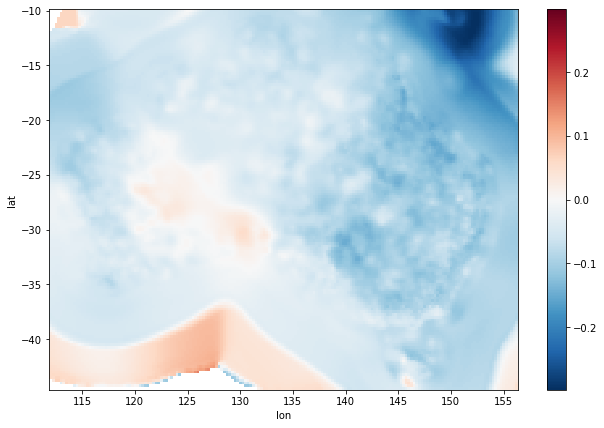

In [38]:
nino3_spatial=np.apply_along_axis(correlate_nino, 0, rr, nino3_modern)
xr.DataArray(nino3_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

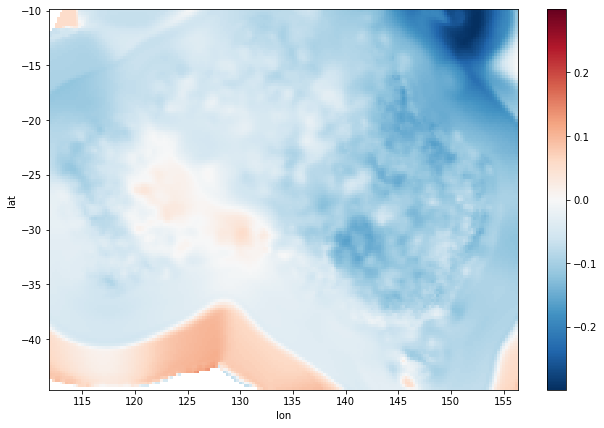

In [39]:
nino34_spatial=np.apply_along_axis(correlate_nino, 0, rr, nino34_modern)
xr.DataArray(nino34_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

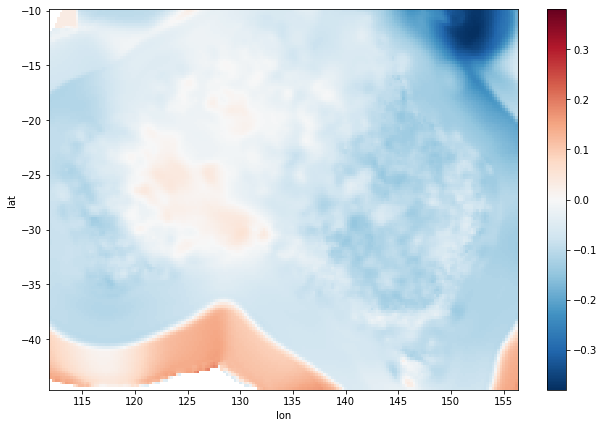

In [40]:
nino4_spatial=np.apply_along_axis(correlate_nino, 0, rr, nino4_modern)
xr.DataArray(nino4_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

In [41]:
rr

<xarray.DataArray 'rr' (time: 1392, lat: 139, lon: 178)>
array([[[0.000000e+00, 0.000000e+00, ..., 2.048290e-02, 1.404263e-02],
        [0.000000e+00, 0.000000e+00, ..., 2.427456e-02, 1.214987e-02],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       [[0.000000e+00, 0.000000e+00, ..., 5.005125e-03, 3.221060e-03],
        [0.000000e+00, 0.000000e+00, ..., 5.861955e-03, 2.631207e-03],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 4.083984e+00, 4.165332e+00],
        [0.000000e+00, 0.000000e+00, ..., 4.115433e+00, 4.189770e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 4.886063e-05, 3.470937e-05],
        [0.000000e+00, 0.000000e+00, ..., 2.984880e-05, 2.848834e-05]],

       [[0.000000e+00, 0.000000e+00, ..., 2.390567e+00, 2.411938e+00],
        [0.000000e+00, 0.000000e+00, ..., 2.366547e+00, 2.390263e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 2.601691e-05, 1.765755e-05],
        [0.000000e+00, 0.000000e+00, ..., 1.541559e-05, 1.409307e-05]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Attributes:
    long_name:  monthly mean precipitation
    units:      mm/day

In [42]:
nino3_modern

<xarray.DataArray 'sst' (time: 1392)>
array([1.6423286, 1.6682945, 1.592558 , ..., 2.5901413, 2.8464956,
       3.0241024], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [43]:
nino3_DJF=nino3_modern.groupby('time.season')['DJF']
nino34_DJF=nino34_modern.groupby('time.season')['DJF']
nino4_DJF=nino4_modern.groupby('time.season')['DJF']
nct_DJF=nct_modern.groupby('time.season')['DJF']
nwp_DJF=nwp_modern.groupby('time.season')['DJF']
nino3_SON=nino3_modern.groupby('time.season')['SON']
nino34_SON=nino34_modern.groupby('time.season')['SON']
nino4_SON=nino4_modern.groupby('time.season')['SON']
nct_SON=nct_modern.groupby('time.season')['SON']
nwp_SON=nwp_modern.groupby('time.season')['SON']
nino3_MAM=nino3_modern.groupby('time.season')['MAM']
nino34_MAM=nino34_modern.groupby('time.season')['MAM']
nino4_MAM=nino4_modern.groupby('time.season')['MAM']
nct_MAM=nct_modern.groupby('time.season')['MAM']
nwp_MAM=nwp_modern.groupby('time.season')['MAM']

In [44]:
nino3_DJF

<xarray.DataArray 'sst' (time: 348)>
array([ 1.64232862e+00,  1.66829455e+00,  1.48306653e-01,  1.75489396e-01,
        2.21114621e-01,  3.47310789e-02,  2.01670647e-01,  2.54831403e-01,
        1.76403618e+00,  1.75722468e+00,  1.64901769e+00, -1.15702569e+00,
       -1.18047583e+00, -1.15416837e+00,  7.56153584e-01,  8.18802297e-01,
        8.41621339e-01,  1.28135443e+00,  1.21680450e+00,  1.02177846e+00,
       -8.91168892e-01, -8.30481827e-01, -8.24430287e-01, -7.36858770e-02,
       -1.59064487e-01, -2.25375369e-01, -9.35200810e-01, -1.06741941e+00,
       -1.12485385e+00, -1.35671723e+00, -1.45701301e+00, -1.43491638e+00,
       -7.96643317e-01, -8.11067522e-01, -8.58861744e-01,  1.20650542e+00,
        1.35051954e+00,  1.46282995e+00, -2.90264577e-01, -3.13343495e-01,
       -2.92571783e-01,  6.16747975e-01,  7.77809262e-01,  8.43326211e-01,
        1.24804246e+00,  1.34657574e+00,  1.23426759e+00, -6.48523927e-01,
       -6.02612495e-01, -5.34835339e-01, -1.65570831e+00, -1.76273978e+00,
       -1.83791161e+00, -1.00276375e+00, -1.13357174e+00, -1.06565905e+00,
        1.59935629e+00,  1.70398140e+00,  1.72530401e+00,  6.35448873e-01,
        9.37724411e-01,  1.02300012e+00, -2.78894246e-01, -3.17424983e-01,
       -4.50151116e-01,  9.62987125e-01,  1.04435992e+00,  7.90485084e-01,
       -1.05219829e+00, -8.90823543e-01, -7.31679440e-01,  6.53849423e-01,
        6.21925771e-01,  5.16590774e-01, -1.27759123e+00, -1.27207267e+00,
       -1.28101265e+00,  8.80691350e-01,  1.06427062e+00,  1.15563023e+00,
...
        4.15464252e-01,  4.04896587e-01,  3.64152014e-01,  1.19289815e+00,
        1.34873164e+00,  1.50985777e+00,  1.94881469e-01,  1.77749112e-01,
        2.51549035e-01,  6.09565198e-01,  5.84309042e-01,  4.85173464e-01,
        8.43848705e-01,  1.03649807e+00,  1.11796641e+00, -5.33481061e-01,
       -5.30273259e-01, -4.79223460e-01, -1.84844017e-01, -2.88686991e-01,
       -3.39730740e-01,  3.46291518e+00,  3.54600763e+00,  3.45555496e+00,
       -4.51082766e-01, -5.84409118e-01, -5.93663871e-01, -8.16747308e-01,
       -9.93650377e-01, -1.01756942e+00, -7.93152675e-02, -8.22179839e-02,
       -9.58510861e-02, -5.26804700e-02, -1.18767940e-01, -6.54468164e-02,
        1.43125534e+00,  1.42907095e+00,  1.32687604e+00,  8.96423042e-01,
        9.14216042e-01,  9.24832165e-01,  9.64787424e-01,  9.69309747e-01,
        8.41501236e-01, -6.70474321e-02, -2.76268214e-01, -3.46767992e-01,
        1.30405426e+00,  1.38485503e+00,  1.21740651e+00, -9.69440639e-01,
       -1.03908408e+00, -1.05106986e+00,  4.93823767e-01,  2.78567731e-01,
        8.53670388e-02,  1.40909600e+00,  1.45025015e+00,  1.45071077e+00,
       -9.30682838e-01, -9.65517223e-01, -8.78611982e-01, -3.65362018e-01,
       -4.13487166e-01, -3.47497553e-01,  5.35460174e-01,  2.88828194e-01,
        9.13190171e-02,  1.50696263e-01,  1.83032051e-01,  7.58879781e-02,
        9.76117551e-01,  9.95131493e-01,  9.14855599e-01,  3.02410245e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2 12

In [45]:
nino4_SON

<xarray.DataArray 'sst' (time: 348)>
array([ 6.44555151e-01,  6.59875989e-01,  7.08527207e-01, -1.41620591e-01,
       -1.46873921e-01, -1.06031768e-01,  3.91490281e-01,  6.05198205e-01,
        7.81193435e-01, -1.54000565e-01, -3.53662550e-01, -5.36415517e-01,
       -1.98468357e-01, -3.03530935e-02,  1.29754856e-01,  7.93779790e-01,
        8.46444726e-01,  8.23822916e-01, -3.71966362e-01, -3.88178229e-01,
       -3.61143947e-01,  2.00688839e-03,  1.78488553e-01,  2.73935795e-01,
       -8.01947236e-01, -8.92599404e-01, -8.59217823e-01, -7.29353130e-01,
       -7.40281999e-01, -8.13727856e-01, -9.51418817e-01, -1.03536224e+00,
       -1.10526145e+00, -3.42456073e-01, -9.39771160e-02,  1.32108137e-01,
        1.57935172e-01,  6.65519163e-02,  3.92991938e-02, -2.39118963e-01,
       -5.97932339e-02,  1.93805888e-01,  4.23993200e-01,  4.56177950e-01,
        5.89127600e-01,  8.10997467e-03, -3.67853612e-01, -5.32700837e-01,
       -5.28033555e-01, -8.36049974e-01, -1.20248592e+00, -1.85327876e+00,
       -1.72546196e+00, -1.54102063e+00,  6.01350665e-02,  3.41361761e-01,
        5.94364524e-01, -6.59456432e-01, -6.55664086e-01, -7.56649733e-01,
        1.74050316e-01,  2.77505696e-01,  2.69129664e-01, -4.23689455e-01,
       -2.09328055e-01, -1.84791330e-02, -4.76199150e-01, -5.99384785e-01,
       -5.76524198e-01,  9.68625396e-02,  1.92369014e-01,  2.74316818e-01,
       -4.99590009e-01, -7.28293836e-01, -9.06698048e-01, -8.46085101e-02,
        1.30402610e-01,  3.63041013e-01,  1.88496381e-01,  2.96538603e-02,
...
        8.51430357e-01,  9.75162923e-01,  1.05554986e+00,  1.12436783e+00,
        7.82300889e-01,  7.50710905e-01,  7.02557504e-01,  6.73269928e-01,
        6.93760216e-01,  7.12744713e-01,  1.00204027e+00,  1.12462747e+00,
        1.22770774e+00,  5.86469352e-01,  4.52491432e-01,  3.03709745e-01,
        1.52507603e-01,  2.12691471e-01,  2.72170991e-01,  1.04740310e+00,
        1.09265673e+00,  1.18778110e+00, -1.90331087e-01, -3.73654455e-01,
       -5.12210488e-01, -4.78854269e-01, -4.34322447e-01, -4.77905035e-01,
       -2.36202344e-01, -7.70858303e-02, -4.01629582e-02,  5.18682420e-01,
        6.63852394e-01,  7.21132934e-01,  1.18194604e+00,  1.22398090e+00,
        1.27434886e+00,  6.83569551e-01,  7.99157083e-01,  8.62012088e-01,
        9.56893861e-01,  1.10575843e+00,  1.21959686e+00,  6.26085460e-01,
        6.18453443e-01,  5.66108584e-01,  8.13201427e-01,  9.91370022e-01,
        1.16666663e+00,  3.00075054e-01,  1.79761752e-01, -1.36757493e-02,
       -2.98162192e-01, -1.63061410e-01, -9.59001258e-02,  8.57349098e-01,
        1.07201362e+00,  1.26803017e+00, -1.70133710e-01, -4.76177692e-01,
       -7.21136212e-01, -1.70976967e-02, -5.24222963e-02, -1.22382954e-01,
        3.88420969e-01,  5.83949029e-01,  7.27664649e-01,  3.66550684e-01,
        4.34538096e-01,  4.90323603e-01,  8.90242279e-01,  9.12841141e-01,
        9.88007545e-01,  1.49237502e+00,  1.55346799e+00,  1.66646945e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1900-10-01 ... 2015-11-01
    month    (time) int64 9 10 11 9 10 11 9 10 11 9 ... 9 10 11 9 10 11 9 10 11

In [46]:
rr_DJF=rr.groupby('time.season')['DJF']
rr_SON=rr.groupby('time.season')['SON']
rr_MAM=rr.groupby('time.season')['MAM']

In [47]:
rr_DJF

<xarray.DataArray 'rr' (time: 348, lat: 139, lon: 178)>
array([[[0.000000e+00, 0.000000e+00, ..., 2.048290e-02, 1.404263e-02],
        [0.000000e+00, 0.000000e+00, ..., 2.427456e-02, 1.214987e-02],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       [[0.000000e+00, 0.000000e+00, ..., 5.005125e-03, 3.221060e-03],
        [0.000000e+00, 0.000000e+00, ..., 5.861955e-03, 2.631207e-03],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 5.744751e+00, 5.944137e+00],
        [0.000000e+00, 0.000000e+00, ..., 5.886577e+00, 6.056709e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 5.803933e-05, 4.070165e-05],
        [0.000000e+00, 0.000000e+00, ..., 3.452613e-05, 3.267776e-05]],

       [[0.000000e+00, 0.000000e+00, ..., 2.390567e+00, 2.411938e+00],
        [0.000000e+00, 0.000000e+00, ..., 2.366547e+00, 2.390263e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 2.601691e-05, 1.765755e-05],
        [0.000000e+00, 0.000000e+00, ..., 1.541559e-05, 1.409307e-05]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Attributes:
    long_name:  monthly mean precipitation
    units:      mm/day

In [48]:
rr_SON

<xarray.DataArray 'rr' (time: 348, lat: 139, lon: 178)>
array([[[0.000000e+00, 0.000000e+00, ..., 6.441242e-03, 4.467962e-03],
        [0.000000e+00, 0.000000e+00, ..., 7.684876e-03, 3.908496e-03],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       [[0.000000e+00, 0.000000e+00, ..., 9.842347e-03, 6.457512e-03],
        [0.000000e+00, 0.000000e+00, ..., 1.142843e-02, 5.351349e-03],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 9.063262e-01, 9.162560e-01],
        [0.000000e+00, 0.000000e+00, ..., 8.869073e-01, 9.015325e-01],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 6.716827e-05, 4.777483e-05],
        [0.000000e+00, 0.000000e+00, ..., 4.123526e-05, 3.938354e-05]],

       [[0.000000e+00, 0.000000e+00, ..., 4.083984e+00, 4.165332e+00],
        [0.000000e+00, 0.000000e+00, ..., 4.115433e+00, 4.189770e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 4.886063e-05, 3.470937e-05],
        [0.000000e+00, 0.000000e+00, ..., 2.984880e-05, 2.848834e-05]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-16 1900-10-16T12:00:00 ... 2015-11-16
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Attributes:
    long_name:  monthly mean precipitation
    units:      mm/day

In [49]:
rr_MAM

<xarray.DataArray 'rr' (time: 348, lat: 139, lon: 178)>
array([[[0.000000e+00, 0.000000e+00, ..., 1.166457e-02, 7.800190e-03],
        [0.000000e+00, 0.000000e+00, ..., 1.443244e-02, 6.722092e-03],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       [[0.000000e+00, 0.000000e+00, ..., 3.023327e-02, 2.052594e-02],
        [0.000000e+00, 0.000000e+00, ..., 3.590731e-02, 1.757350e-02],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 4.171395e+00, 4.276277e+00],
        [0.000000e+00, 0.000000e+00, ..., 4.190261e+00, 4.293013e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 4.944521e-05, 3.475318e-05],
        [0.000000e+00, 0.000000e+00, ..., 3.136003e-05, 2.956671e-05]],

       [[0.000000e+00, 0.000000e+00, ..., 8.741666e+00, 8.897529e+00],
        [0.000000e+00, 0.000000e+00, ..., 8.663809e+00, 8.825597e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 2.140980e-05, 1.502922e-05],
        [0.000000e+00, 0.000000e+00, ..., 1.321184e-05, 1.246271e-05]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-03-16T12:00:00 ... 2015-05-16T12:00:00
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Attributes:
    long_name:  monthly mean precipitation
    units:      mm/day

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


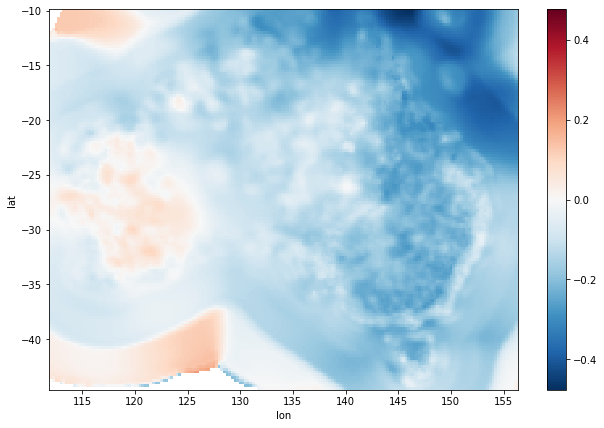

In [50]:
nino3_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nino3_SON)
xr.DataArray(nino3_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

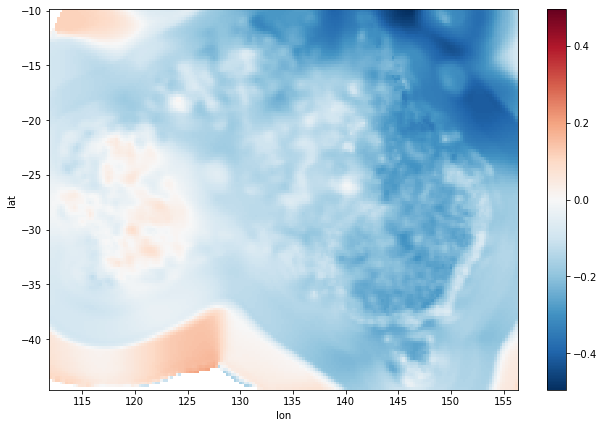

In [51]:
nino34_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nino34_SON)
xr.DataArray(nino34_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

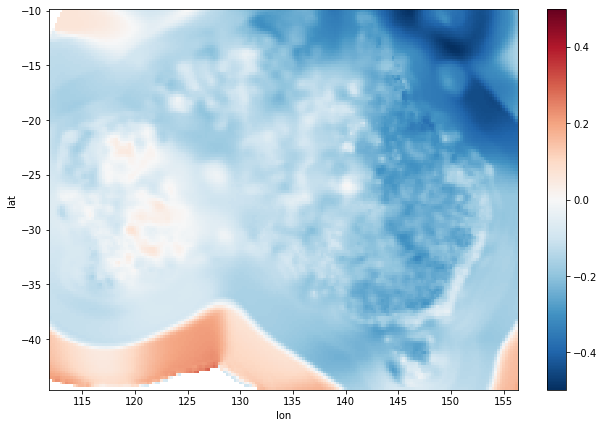

In [52]:
nino4_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nino4_SON)
xr.DataArray(nino4_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

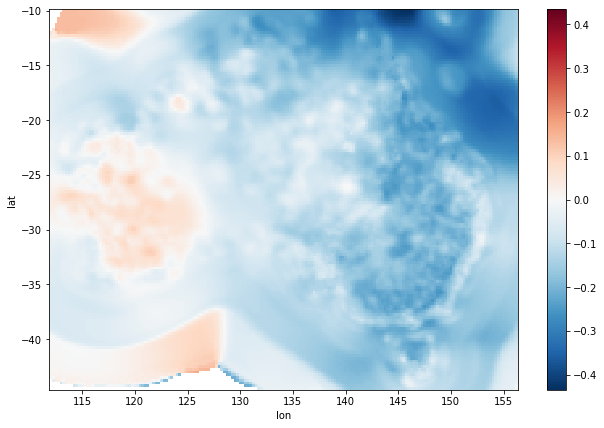

In [53]:
nct_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nct_SON)
xr.DataArray(nct_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

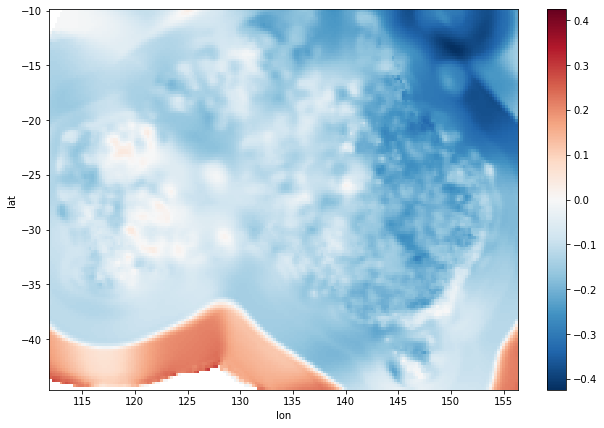

In [54]:
nwp_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nwp_SON)
xr.DataArray(nwp_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

In [55]:
nino3_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nino3_DJF)
xr.DataArray(nino34_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

NameError: name 'nino34_DJF_spatial' is not defined

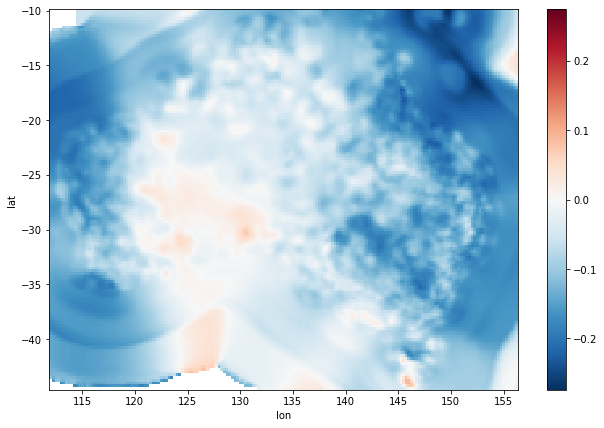

In [56]:
nino3_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nino3_DJF)
xr.DataArray(nino3_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

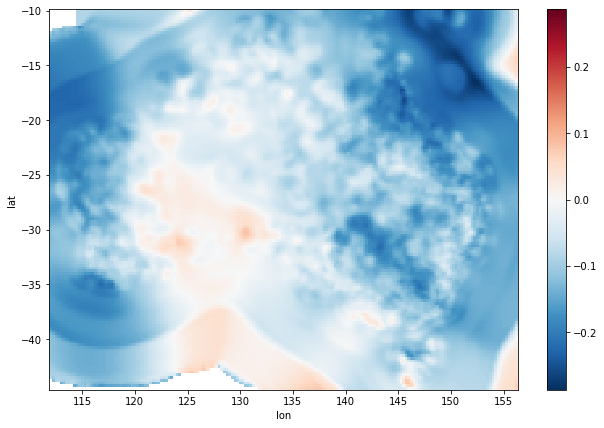

In [57]:
nino34_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nino34_DJF)
xr.DataArray(nino34_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

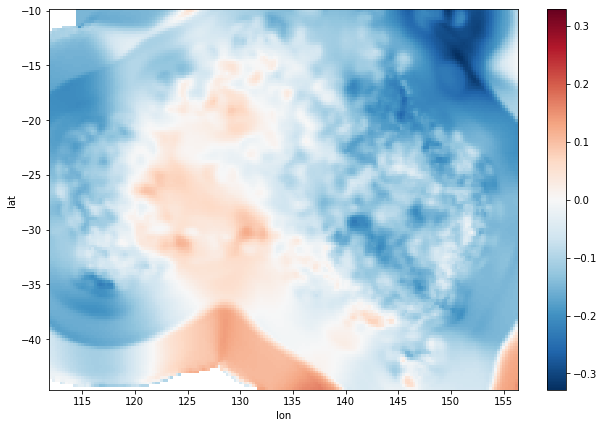

In [58]:
nino4_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nino4_DJF)
xr.DataArray(nino4_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

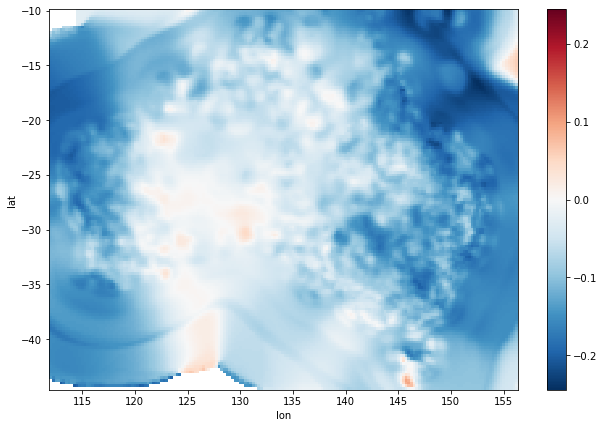

In [59]:
nct_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nct_DJF)
xr.DataArray(nct_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

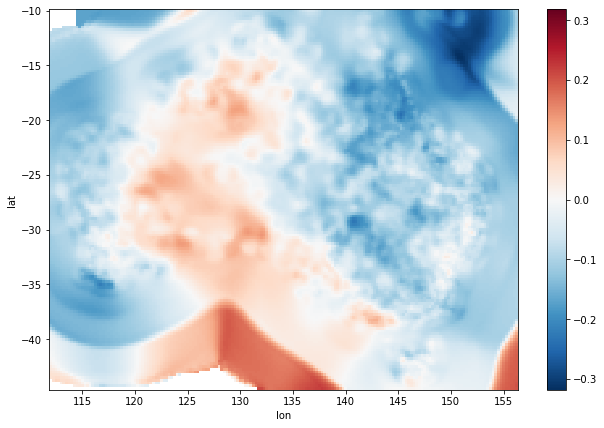

In [60]:
nwp_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nwp_DJF)
xr.DataArray(nwp_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

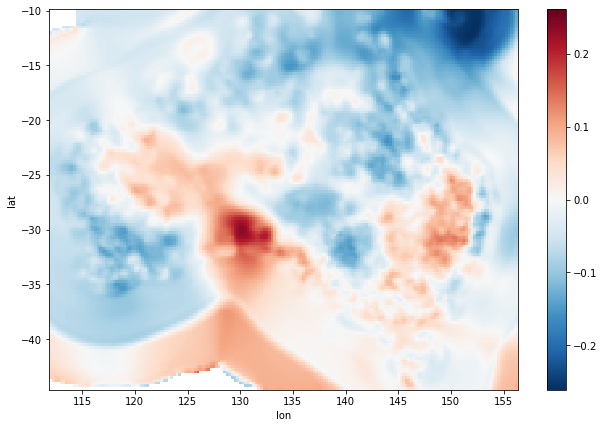

In [61]:
nino3_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nino3_MAM)
xr.DataArray(nino3_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

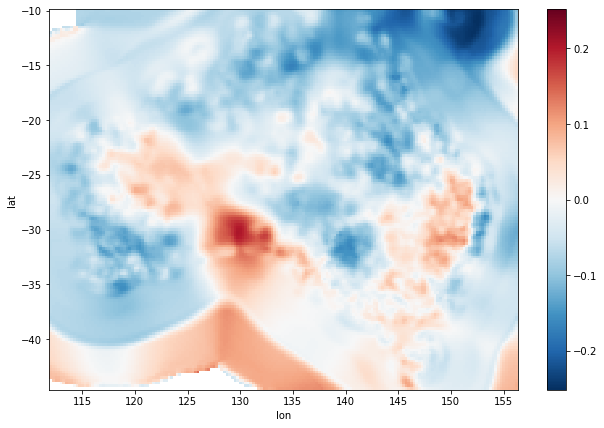

In [62]:
nino34_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nino34_MAM)
xr.DataArray(nino34_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

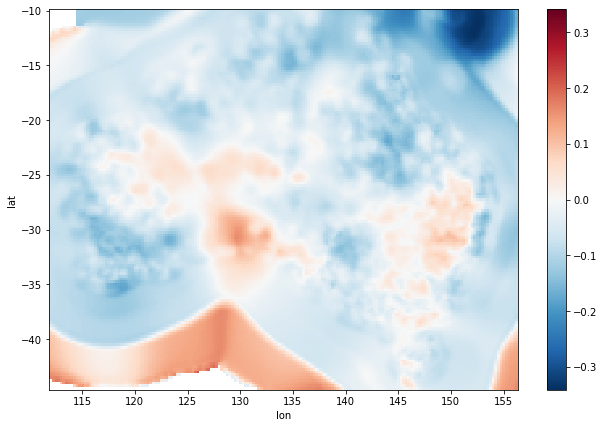

In [63]:
nino4_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nino4_MAM)
xr.DataArray(nino4_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

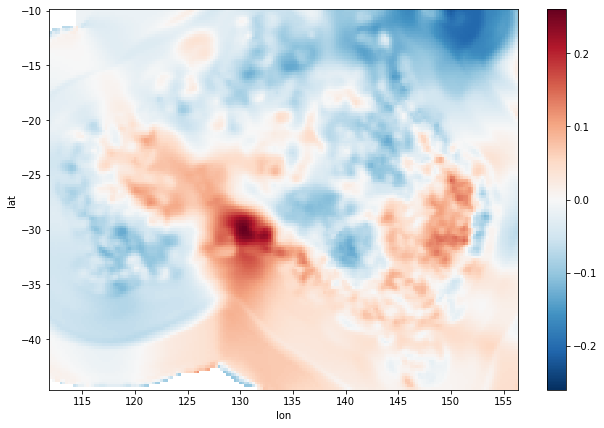

In [64]:
nct_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nct_MAM)
xr.DataArray(nct_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

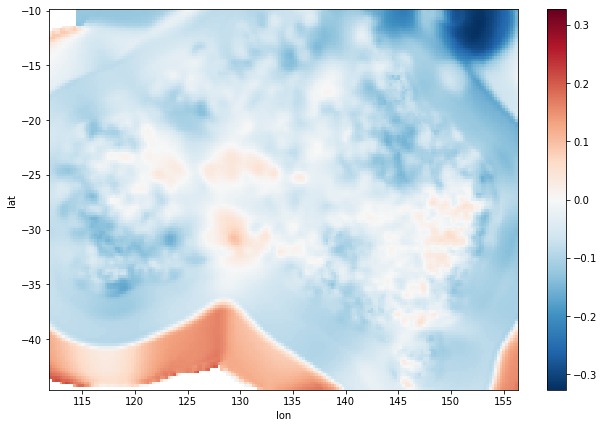

In [65]:
nwp_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nwp_MAM)
xr.DataArray(nwp_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)